# This notebook builds an end to end multi-class image classifier using Tenserflow and Tenserflow Hub

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Feautures

Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF version", hub.__version__)

TF version 2.3.0
TF version 0.9.0


## Getting data ready, turning it into tensors

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [5]:
labels_csv = pd.read_csv("data/labels.csv")

In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,ee8ed8bcfdf48a835e39bb8deca77249,scottish_deerhound
freq,1,126


(array([15., 22., 30., 18., 12.,  4.,  9.,  5.,  4.,  1.]),
 array([ 66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.]),
 <BarContainer object of 10 artists>)

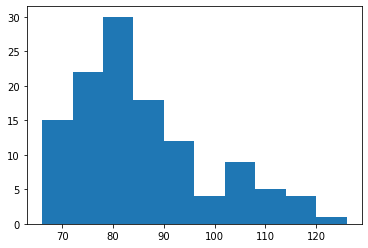

In [7]:
plt.hist(labels_csv.breed.value_counts())

In [8]:
labels_csv.breed.value_counts().median()

82.0

In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


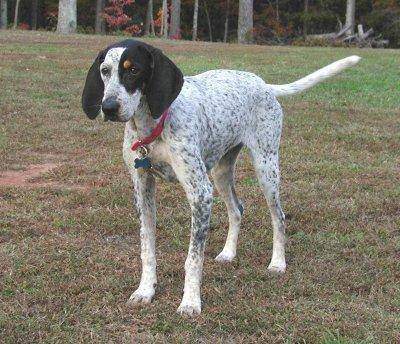

In [326]:
from IPython.display import Image
Image("data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

### Getting images and their labels

get a list of images file pathnames

In [8]:
image_paths = ["data/train/" + img_id + ".jpg" for img_id in labels_csv.id]
image_paths[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# Check if number of image_paths matches number of actual image files

import os

In [327]:
len(os.listdir("data/train/")) == len(image_paths)

False

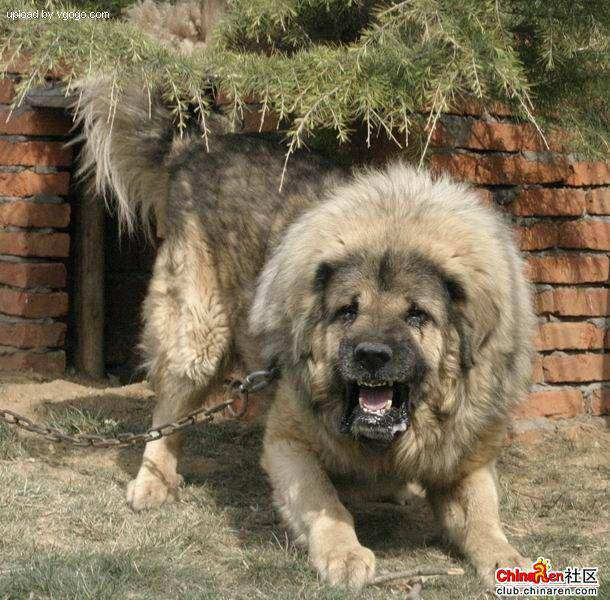

In [15]:
Image(image_paths[9000])

In [16]:
labels_csv.breed[9000]

'tibetan_mastiff'

In [11]:
import numpy as np
labels = labels_csv.breed.to_numpy()

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
# Check if number of labels matches number of image_paths

len(labels) == len(image_paths)

True

In [13]:
# Check number of unique breads 

unigue_breads = np.unique(labels)
len(unigue_breads)

120

In [14]:
# Turn every label into boolearn array

boolean_labels = [label == unigue_breads for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [15]:
len(boolean_labels)

10222

In [16]:
len(labels)

10222

In [17]:
# Example : Turning boolean array into int

print(labels[0])
print(boolean_labels[0].astype(int))


boston_bull
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
# Creating our own validation set
# Creating X and y variables

X = image_paths
y = boolean_labels


In [19]:
# We are going to start with 1000 images and increase as needed.

# Set number if images used for experimenting

NUM_IMAGES = 1000



In [20]:
# let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(800, 200, 800, 200)

In [29]:
X_train[:2], y_train[:2]

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,

### Preprocessing images (turning images into Tensors)

In [22]:
from matplotlib.pyplot import imread
image = imread(image_paths[42])
image[:1]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]]], dtype=uint8)

In [32]:
image.shape

(257, 350, 3)

In [33]:
# turn image into tensor

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>


### Func for preprocessing images:
* Take an image filepath as input  
* Use TensorFlow to read the file and save it to a variable, image  
* Turn our image (a jpg) into Tensors  
* Normalize our image (convert color channel values from from 0-255 to 0-1).  
* Resize the image to be a shape of (224, 224)  
* Return the modified image  

In [23]:
# Define image size
IMG_SIZE = 224

def process_image(image_path, image_size=IMG_SIZE):
    """ Takes an images path and turns it into tensor """
    
    # Read in an image path
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 color chanels (Red, Greed, Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # Resize the image to our derired value
    image = tf.image.resize(image, size=[image_size, image_size])
    
    return image

In [24]:
# Step by step expl what each line of code in func is doing
tensor = tf.io.read_file(image_paths[26])
image = tf.image.decode_jpeg(tensor, channels=3)
image[:1]

<tf.Tensor: shape=(1, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]]], dtype=uint8)>

In [25]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image[:1]

<tf.Tensor: shape=(1, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]]], dtype=float32)>

## Turning our data into batches

In order to use TensorFlow effectively, we need data in form of tuple : 
`(image, label)`

In [26]:
# Create a simple func to create tensor tuple with image and labels

def get_image_label(image_path, label):
    """Take image file path name and assosciated label, processes the image and returns
       tuple of (image, label). """
    image = process_image(image_path)
    return image, label
    

In [135]:
get_image_label(X[42], tf.constant(y[42]));

In [223]:
# Define the batch size, 32 is a good start

BATCH_SIZE = 32

# Create a func to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates butches of data out of image (X) and label (y) pairs. 
    Shuffles the data if it's training data, but does not if it's validation data.
    Also accepts test data as input (no labels).
    """
    if test_data:
        
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
        data_batch = data.map(process_image).batch(batch_size)
        
        return data_batch
    elif valid_data:
        print("Creating valid data batches...")
        
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(batch_size)
        
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathnames and labels before mapping faster than image
        data = data.shuffle(buffer_size=len(X))
        
        # Create image label tuples (also turns the image paths into preprocesed images)
        data = data.map(get_image_label)
        
        # Turn training data into batches
        data_batch =  data.batch(batch_size)
        
        return data_batch

In [29]:
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid, valid_data=True)


Creating training data batches...
Creating valid data batches...


In [30]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualasing Data Batches 

In [31]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    
    # Setup the figure
    plt.figure(figsize=(10, 10))
    
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as a title
        plt.title(unigue_breads[labels[i].argmax()])
        plt.axis("off")

In [52]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [53]:
train_images, train_labels = next(train_data.as_numpy_iterator())

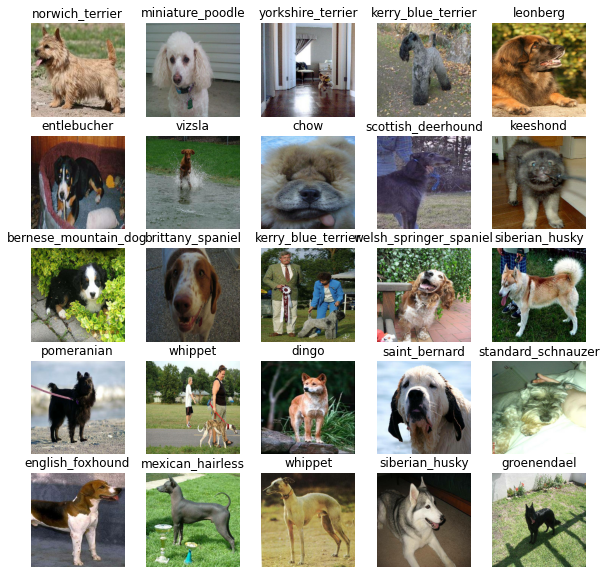

In [54]:
show_25_images(train_images, train_labels)

## Building the model

Before we build a model we need to prepare:
- Input shape (our image shape in form of tensors) to our model
- Output shape (image labels in form if tensors)
- The url of the model we want to use

In [32]:
# Setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model

OUTPUT_SHAPE = len(unigue_breads)

# Setup model URL

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


## Let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion .
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [46]:
@tf.autograph.experimental.do_not_convert
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    # Setup model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url), # Layer 1, input layer
        tf.keras.layers.Dense(units=output_shape, activation="softmax") # Layer 2, output layer
    ])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
    
    model.build(input_shape)
     
    return model

In [47]:
model = create_model()

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

In [36]:
#Tensorboard callback

%load_ext tensorboard


* Load the TensorBoard notebook extension.
* Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
* Visualize the our models training logs using the %tensorboard magic function

In [48]:
import datetime

def create_tensorboard_callback():
    logdir = os.path.join("data/logs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(log_dir=logdir)



In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)


## Training a model on a subset of data

Our firsr model will be trained on 1000 images, to make sure everything is working.

In [50]:
NUM_EPOCHS = 10

def train_model():
    model = create_model()
    
    #Create new TensorBoard session every time we train a model
    tensorboard = create_tensorboard_callback()
    
    model.fit(train_data, epochs=NUM_EPOCHS, validation_data=valid_data, validation_freq=1, callbacks=[tensorboard, early_stopping])
    
    return model


In [83]:
model = train_model()

Epoch 1/10
 1/25 [>.............................] - ETA: 0s - loss: 5.7024 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\x0658602\_PythonProjects\DogBreedClassification\env\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 36s 1s/step - loss: 4.4423 - accuracy: 0.1262 - val_loss: 3.4458 - val_accuracy: 0.2850
Epoch 2/10
25/25 [==============================] - 32s 1s/step - loss: 1.5718 - accuracy: 0.6900 - val_loss: 2.2004 - val_accuracy: 0.5150
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 0.5460 - accuracy: 0.9362 - val_loss: 1.7215 - val_accuracy: 0.5800
Epoch 4/10
25/25 [==============================] - 31s 1s/step - loss: 0.2445 - accuracy: 0.9875 - val_loss: 1.5532 - val_accuracy: 0.5950
Epoch 5/10
25/25 [==============================] - 40s 2s/step - loss: 0.1412 - accuracy: 0.9975 - val_loss: 1.4751 - val_accuracy: 0.6050
Epoch 6/10
25/25 [==============================] - 43s 2s/step - loss: 0.0978 - accuracy: 0.9987 - val_loss: 1.4355 - val_accuracy: 0.6100
Epoch 7/10
25/25 [==============================] - 42s 2s/step - loss: 0.0736 - accuracy: 0.9987 - val_loss: 1.4087 - val_accuracy: 0.6150
Epoch 8/10
25/25 [=============

In [85]:
%tensorboard --logdir data/logs/

Reusing TensorBoard on port 6006 (pid 13080), started 0:00:45 ago. (Use '!kill 13080' to kill it.)

In [87]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [71]:
# Make preds on validation data (not used to train)

predictions = loaded_1000img_model.predict(valid_data, verbose=1)
predictions

7/7 [==============================] - 5s 730ms/step


array([[1.0390787e-03, 2.7870215e-04, 7.0314092e-04, ..., 1.3895787e-04,
        4.5231096e-05, 2.5531235e-03],
       [2.5277089e-03, 2.3709724e-03, 1.5933141e-02, ..., 1.1265008e-03,
        6.1338707e-03, 1.1181373e-04],
       [4.2856130e-04, 7.2496397e-05, 7.5397838e-05, ..., 6.2635663e-05,
        4.5629338e-05, 3.8947727e-04],
       ...,
       [5.7298153e-06, 3.8810802e-05, 7.9032587e-05, ..., 4.9560022e-05,
        1.1347140e-04, 5.2598072e-05],
       [3.5233006e-03, 1.6767428e-04, 2.2751113e-04, ..., 6.2978135e-05,
        5.6093242e-05, 8.5915495e-03],
       [5.8959320e-04, 2.3629666e-05, 2.9916241e-04, ..., 1.1909599e-03,
        1.2575276e-04, 1.0716706e-05]], dtype=float32)

In [93]:
np.sum(predictions[0])

1.0000001

In [97]:
# First prediction

index = 13
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])} ")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unigue_breads[np.argmax(predictions[index])]}")

Max value (probability of prediction): 0.719075620174408
Sum: 1.0000001192092896 
Max index: 117
Predicted label: whippet


### Prediction probabilities alsa known as confidence levels.

In [51]:
# Turn prediction probabilities into their respected label

def get_pred_label(prediction_prob):
    """
    Returns an array of prediction probabilities into a label.
    """
    return unigue_breads[np.argmax(prediction_prob)]

In [140]:
def unbatch_data(data, with_labels=True):
    images = []
    labels = []
    
    if with_labels:
        for image, label in data.unbatch().as_numpy_iterator():
            images.append(image)
            labels.append(unigue_breads[np.argmax(label)])
        return images, labels
    else:
        for image in data.unbatch().as_numpy_iterator():
            images.append(image)
        return images
        


In [42]:
val_images, val_labels = unbatch_data(valid_data)

In [73]:
val_labels;

### Visualise our predictions

The first function we'll create will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [53]:
def plot_pred(prediction_probs, labels, images, n=1):
    pred_prob, true_label, image = prediction_probs[n], labels[n], images[n]
    
    pred_label = get_pred_label(pred_prob)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    #Change the color
    if pred_label == true_label:
        color="green"
    else:
        color="red"
        
    plt.title(f"Predicted: {pred_label}, Probability: {np.max(pred_prob) * 100:.2f}, True Label: {true_label}", color=color)

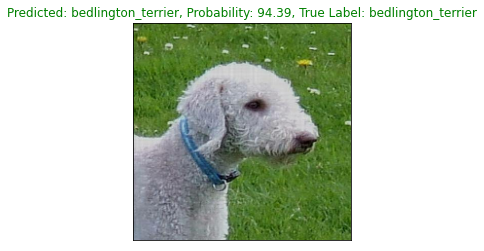

In [332]:
plot_pred(predictions, val_labels, val_images, 5)

In [55]:
def plot_pred_conf(prediction_probs, labels, n):
    pred_prob, label = prediction_probs[n], labels[n]
    
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    
    # Find the top 10 prediction values
    top_10_pred_labels = unigue_breads[top_10_pred_indexes]
    
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    
    if np.isin(label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == label)].set_color("green")

In [231]:
predictions[0].argsort()[-10:][::-1] # top 10 indexes of prediction 0

array([ 17,  26, 103,  73,  70,  59,  35, 109, 106,  77], dtype=int64)

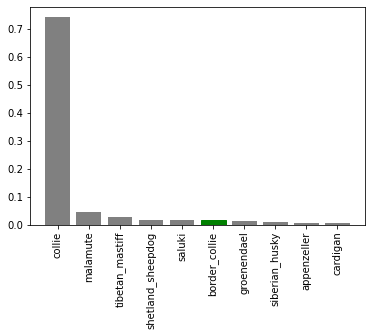

In [239]:
plot_pred_conf(predictions, val_labels, 9)

In [56]:
# Create func to save and reload a trained model
def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (str)
    for clarity and reuse.
    """
  # Create model directory with current time
    modeldir = os.path.join("data/models",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to: {model_path}...")
    
    model.save(model_path)
    
    return model_path

In [57]:
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")
    
    model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [63]:
path = save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: data/models\20210226-003333-1000-images-mobilenetv2-Adam.h5...


In [69]:
loaded_1000img_model = load_model("data/models/20210225-224001-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: data/models/20210225-224001-1000-images-mobilenetv2-Adam.h5


In [67]:
model.evaluate(valid_data)

7/7 [==============================] - 5s 722ms/step - loss: 5.7277 - accuracy: 0.0150


[5.72769832611084, 0.014999999664723873]

In [70]:
loaded_1000img_model.evaluate(valid_data)

7/7 [==============================] - 5s 687ms/step - loss: 1.3603 - accuracy: 0.6550


[1.3603427410125732, 0.6549999713897705]

## Training a model on a full data set

In [58]:
len(X), len(y)

(10222, 10222)

In [59]:
# Create a data batch with the full data set

full_data = create_data_batches(X, y)

Creating training data batches...


In [60]:
full_model = create_model()

In [61]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=2)

In [62]:
full_model.fit(full_data, epochs=10, callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/10
  1/320 [..............................] - ETA: 0s - loss: 6.0215 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\x0658602\_PythonProjects\DogBreedClassification\env\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


320/320 [==============================] - 362s 1s/step - loss: 1.3405 - accuracy: 0.6689
Epoch 2/10
320/320 [==============================] - 365s 1s/step - loss: 0.4040 - accuracy: 0.8787
Epoch 3/10
320/320 [==============================] - 364s 1s/step - loss: 0.2376 - accuracy: 0.9344
Epoch 4/10
320/320 [==============================] - 364s 1s/step - loss: 0.1525 - accuracy: 0.9635
Epoch 5/10
320/320 [==============================] - 365s 1s/step - loss: 0.1050 - accuracy: 0.9790
Epoch 6/10
320/320 [==============================] - 365s 1s/step - loss: 0.0756 - accuracy: 0.9874
Epoch 7/10
320/320 [==============================] - 367s 1s/step - loss: 0.0593 - accuracy: 0.9901
Epoch 8/10
320/320 [==============================] - 367s 1s/step - loss: 0.0472 - accuracy: 0.9937
Epoch 9/10
320/320 [==============================] - 368s 1s/step - loss: 0.0380 - accuracy: 0.9963
Epoch 10/10
320/320 [==============================] - 369s 1s/step - loss: 0.0309 - accuracy: 0.9971


In [80]:
full_model_path = save_model(full_model, suffix="full-data-mobilenetv2-Adam")

Saving model to: data/models\20210226-004258-full-data-mobilenetv2-Adam.h5...


In [81]:
loaded_full_model = load_model(full_model_path)

Loading saved model from: data/models\20210226-004258-full-data-mobilenetv2-Adam.h5


In [324]:
loaded_full_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Making prediction on the test data

To make predictions we need to:
* Get the test image filenames
* Convert filenames into test data batches



In [84]:
test_path = "data/test/"
test_filepaths = [test_path + fname for fname in os.listdir(test_path)]

In [86]:
test_filepaths[:2]

['data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'data/test/00102ee9d8eb90812350685311fe5890.jpg']

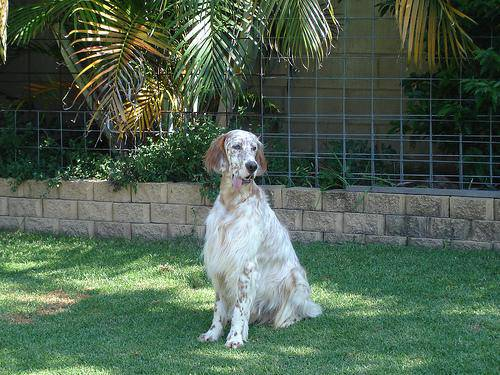

In [92]:
Image(test_filepaths[2])

In [93]:
test_data = create_data_batches(test_filepaths, test_data=True)
test_data

Creating test data batches...


In [115]:
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 398s 1s/step


In [97]:
np.savetxt("data/preds_array.csv", test_predictions, delimiter=",")

In [110]:
test_predictions = np.loadtxt("data/preds_array.csv", delimiter=",")

## Preparing test data set prediction for Kaggle

In [111]:
preds_df = pd.DataFrame(columns=["id"] + list(unigue_breads))
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [112]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
preds_df[list(unigue_breads)] = test_predictions

In [119]:
preds_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00102ee9d8eb90812350685311fe5890,0.000019,0.000005,0.000001,0.0,0.000012,0.000001,0.000011,0.000012,0.000001,...,0.0,0.000001,0.0,0.000051,0.0,0.000001,0.000544,0.0,0.000001,0.0
2,0012a730dfa437f5f3613fb75efcd4ce,0.0,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000003,0.000001,0.000001,0.0,0.000007,0.0,0.0
3,001510bc8570bbeee98c8d80c8a95ec1,0.000068,0.000041,0.000004,0.000122,0.000442,0.000007,0.0,0.0,0.000001,...,0.000008,0.0,0.000003,0.0,0.000001,0.0,0.0,0.026141,0.0,0.000003
4,001a5f3114548acdefa3d4da05474c2e,0.001006,0.000047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.0,0.00001,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,...,0.000005,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0
10353,fff1ec9e6e413275984966f745a313b0,0.0,0.0,0.0,0.000002,0.0,0.0,0.000003,0.0,0.000001,...,0.0,0.0,0.000001,0.0,0.994048,0.0,0.0,0.000003,0.0,0.0
10354,fff74b59b758bbbf13a5793182a9bbe4,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0
10355,fff7d50d848e8014ac1e9172dc6762a3,0.000447,0.000004,0.000001,0.0,0.0,0.0,0.000003,0.0,0.0,...,0.000042,0.000003,0.0,0.0,0.0,0.0,0.000001,0.0,0.000075,0.000133


In [122]:
preds_df.to_csv("data/full_model_prediction_submission_1.csv", index=False)

## Making prediction on custom images

To make prediction on our custom images, we will:
* Get the filepaths of our own images.
* Turn the filepaths into data batches, set test_data to true
* Pass the custom image data batch to our model predict
* Convert the prediction output pobabilities to prediction labels
* Compare the predicted labels to the custom images


In [133]:
custom_img_path = "data/custom_images/"

custom_img_filepaths = [custom_img_path + filename for filename in os.listdir(custom_img_path)]

In [184]:
last_image_filepath = [custom_img_path + os.listdir(custom_img_path)[-1]]
last_image_filepath

['data/custom_images/labrador.jpg']

In [134]:
custom_img_filepaths

['data/custom_images/german shepard.jpg',
 'data/custom_images/husky-dog.jpg',
 'data/custom_images/labrador.jpg']

In [199]:
cust_img_test = create_data_batches(custom_img_filepaths, test_data=True)
cust_img_test

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [136]:
cust_img_preds = loaded_full_model.predict(cust_img_test)

In [138]:
# Get custom image prediction labels

custom_pred_labels = [get_pred_label(cust_img_preds[i]) for i in range(len(cust_img_preds))]

In [139]:
custom_pred_labels

['german_shepherd', 'siberian_husky', 'labrador_retriever']

In [141]:
custom_images = unbatch_data(cust_img_test, with_labels=False)

In [298]:
def predict_plot_custom_image(model):
    
    # create filepath of the last uploaded image
    file_paths = [custom_img_path + filename for filename in os.listdir(custom_img_path)]
    file_paths.sort(key=os.path.getmtime)
    
    last_image_filepath = [file_paths[-1]]
    # Create data batch
    custom_image_data = create_data_batches(last_image_filepath, test_data=True)
    # Make prediction 
    custom_image_probs = model.predict(custom_image_data)
    # Get prediction label
    custom_pred_label = get_pred_label(custom_image_probs)
    #Unbatch the data 
    custom_image = [image for image in custom_image_data.unbatch().as_numpy_iterator()]
    
    plt.figure(figsize=(6, 6))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{custom_pred_label} with {np.max(custom_image_probs) * 100:.2f}% probability", color="white")
    plt.imshow(custom_image[0])

In [177]:
# Check custom predictions

def plot_custom_images(prediction_probs, custom_images):
    
    plt.figure(figsize=(10, 10))
    for index, image in enumerate(custom_images):
        pred_prob = prediction_probs[index]
        plt.subplot(1, len(custom_images), index+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(f"{custom_pred_labels[index]} with {np.max(pred_prob) * 100:.2f}% probability", color="white")
        plt.imshow(image)
        plt.subplots_adjust(right=1.5)

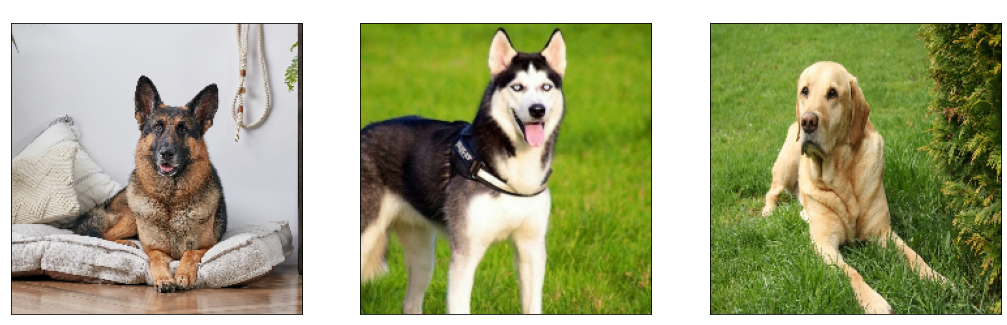

In [178]:
plot_custom_images(cust_img_preds, custom_images)

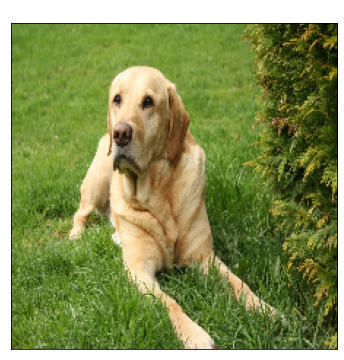

In [325]:
predict_plot_custom_image(loaded_full_model)